In [1]:
from neo4j_setup import *
from algorithms import *
import matplotlib.pyplot as plt

In [2]:
# Purge the database
prep_db()

Neo4j database was successfully purged of data


In [3]:
# Create the database
create_db()

### Query to find the most popular genre of games between 1980-2023
This query is performed using the centrality algorithm **PageRank**. The most popular genre is based on the amount of relations between each game and genre.

In [4]:
# Create a Graph projection with only the game and genre nodes.
page_rank_projection()

In [5]:
# Call the algorithm
genres = get_most_popular_genre()

x = []
y = []

for genre in genres:
    x.append(genre[0])
    y.append(genre[1])

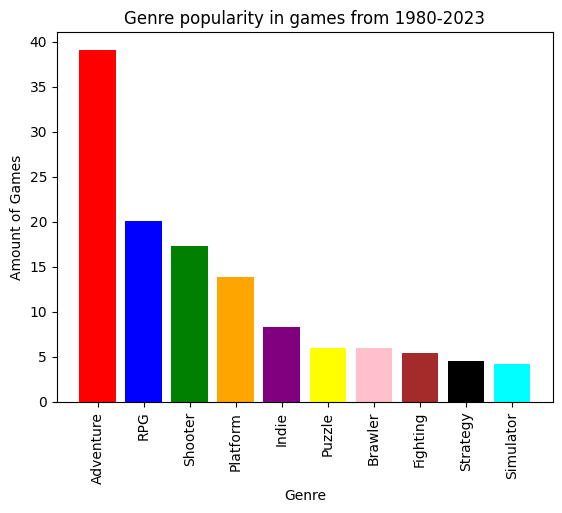

In [6]:
# Bar chart

# Create bar chart

colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'pink', 'brown', 'black', 'cyan']

plt.bar(x, y, color=colors)

# Add labels and title
plt.xlabel('Genre')
plt.ylabel('Amount of Games')
plt.title('Genre popularity in games from 1980-2023')
plt.xticks(rotation=90)

# Display chart
plt.show()

### KNN Algorithm on our Neo4j DB.

In [3]:
# First we will have to, create our graph projection and store it in the graph catalog.
create_knn_projection()

# Then we will estimate the memory requirements for running the algorithm.
knn_memory_estimation()

# Then we will run the algorithm, and stream results.
knn_stream_mode()

# Then we will run the algorithm and return the result in form of statistical and measurement values.
knn_stat_mode()

# Then we will run the algorithm, and write back results to the in-memory graph
knn_mutate_mode()

# Then we will run the algorithm, and write back results.
write_knn_graph()

Query failed: {code: Neo.ClientError.Procedure.ProcedureCallFailed} {message: Failed to invoke procedure `gds.graph.project`: Caused by: java.lang.UnsupportedOperationException: Loading of values of type String is currently not supported}
Query failed: {code: Neo.ClientError.Procedure.ProcedureCallFailed} {message: Failed to invoke procedure `gds.knn.write.estimate`: Caused by: java.util.NoSuchElementException: Graph with name `KNN-Games` does not exist on database `neo4j`. It might exist on another database.}
Query failed: {code: Neo.ClientError.Procedure.ProcedureCallFailed} {message: Failed to invoke procedure `gds.knn.stream`: Caused by: java.util.NoSuchElementException: Graph with name `KNN-Games` does not exist on database `neo4j`. It might exist on another database.}
Query failed: {code: Neo.ClientError.Procedure.ProcedureCallFailed} {message: Failed to invoke procedure `gds.knn.stats`: Caused by: java.util.NoSuchElementException: Graph with name `KNN-Games` does not exist on da

## Degree Centrality in Neo4j 


In [2]:
# Creates the wanted projection
degree_centrality_projection()

Query failed: {code: Neo.ClientError.Procedure.ProcedureCallFailed} {message: Failed to invoke procedure `gds.graph.project`: Caused by: java.lang.IllegalArgumentException: A graph with name 'DegreeCentrality' already exists.}


In [3]:
# The cost of running the algorithm using the estimate procedure.
estimate_cpu_cost()

[<Record nodeCount=1135 relationshipCount=2689 bytesMin=56 bytesMax=56 requiredMemory='56 Bytes'>]

In [4]:
# Calculate which node has the highest degree
calculate_highest_degree_centrality()

[<Record gameName='Fire Emblem: Thracia 776' degree=100>,
 <Record gameName='Uncharted: The Lost Legacy' degree=98>,
 <Record gameName='Shantae and the Seven Sirens' degree=92>,
 <Record gameName='Fire Emblem: Genealogy of the Holy War' degree=68>,
 <Record gameName='Kingdoms of Amalur: Reckoning' degree=64>,
 <Record gameName='Marvel Snap' degree=62>,
 <Record gameName='Metal: Hellsinger' degree=60>,
 <Record gameName='Mega Man X8' degree=60>,
 <Record gameName='Mega Man X7' degree=56>,
 <Record gameName='Metal Gear Solid V: The Phantom Pain' degree=55>,
 <Record gameName='Wanted: Dead' degree=51>,
 <Record gameName="Assassin's Creed" degree=50>,
 <Record gameName="Assassin's Creed IV Black Flag" degree=50>,
 <Record gameName='Fire Emblem: Path of Radiance' degree=49>,
 <Record gameName="Assassin's Creed" degree=49>,
 <Record gameName='Metroid Prime 2: Echoes' degree=47>,
 <Record gameName='God of War' degree=47>,
 <Record gameName='Neon White' degree=46>,
 <Record gameName='The Evil 